In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [2]:
df = pd.read_csv("/content/cleaned_student_data.csv")
df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.296250,1.773994,-0.884382,0.663124,-0.956359,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.079265,1.832796,0.651195,-1.731343,-0.750295,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.047801,-1.023317,-0.357863,-0.233684,0.801537,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-4.149161,-1.136386,-0.481705,0.055879,1.871249,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-2.393534,-1.761910,1.372795,-0.369802,2.048341,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
# Spiltting features and targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def evaluate(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, mae, rmse

In [6]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_results = evaluate(y_test, lr_pred)
lr_results

(0.0, 0.06436901913875692, np.float64(0.2515663213261046))

In [7]:
# Decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_results = evaluate(y_test, dt_pred)
dt_results

(1.0, 0.0, np.float64(0.0))

In [8]:
# Random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_results = evaluate(y_test, rf_pred)
rf_results

(0.0, 0.0175, np.float64(0.04123105625617661))

In [9]:
# Comparing the above 3 models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [lr_results[0], dt_results[0], rf_results[0]],
    "MAE": [lr_results[1], dt_results[1], rf_results[1]],
    "RMSE": [lr_results[2], dt_results[2], rf_results[2]]})
results

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.0,0.064369,0.251566
1,Decision Tree,1.0,0.000000,0.000000
2,Random Forest,0.0,0.017500,0.041231


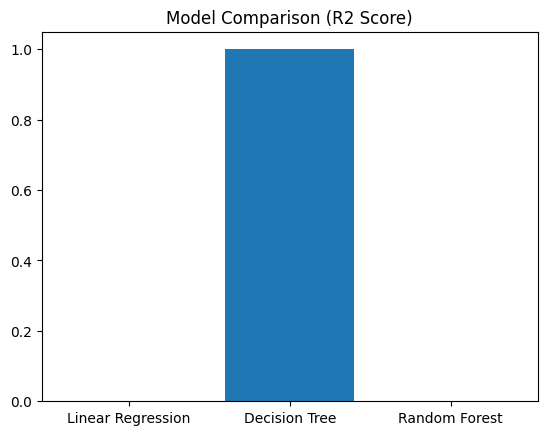

In [10]:
plt.bar(results["Model"], results["R2 Score"])
plt.title("Model Comparison (R2 Score)")
plt.show()

In [12]:
# Hyperparameter tuning
rf_tuned = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)
rf_tuned_results = evaluate(y_test, rf_tuned_pred)
rf_tuned_results

(0.0, 0.0175, np.float64(0.04123105625617661))

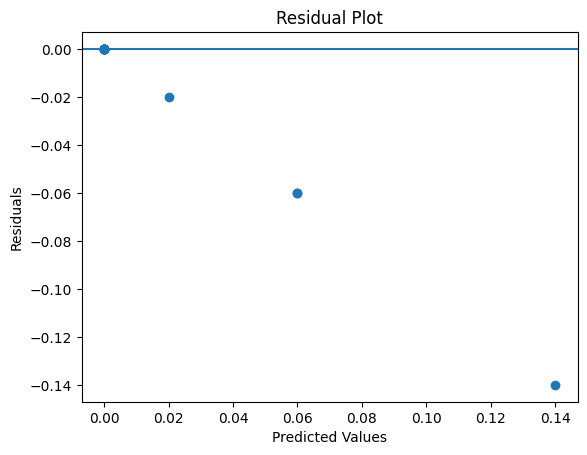

In [14]:
residuals = y_test - rf_tuned_pred
plt.scatter(rf_tuned_pred, residuals)
plt.axhline(0)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals") # Residuals = Actual value − Predicted value
plt.show()

In [16]:
# To save the model
joblib.dump(rf_tuned, "final_model.pkl") # .pkl is used to save a trained machine learning model.

['final_model.pkl']